In [1]:
import numpy as np 
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score,mean_squared_error,roc_curve,accuracy_score,log_loss,auc
from sklearn.model_selection import train_test_split


In [2]:
df=pd.read_csv('train.csv')
df1=pd.read_csv('test.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:>

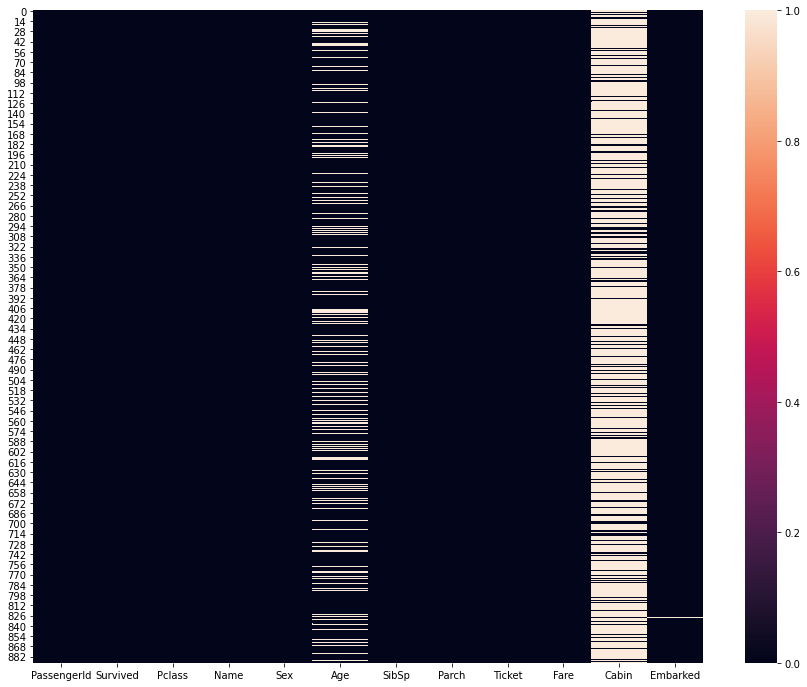

In [4]:
plt.figure(figsize=(15,12))
sns.heatmap(df.isnull())


<AxesSubplot:>

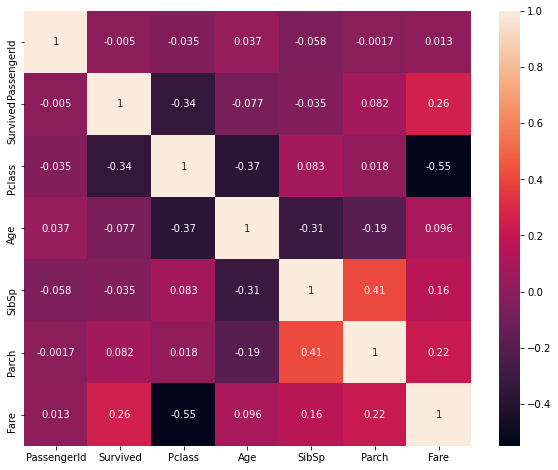

In [5]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
print(df.shape)
df.info()


(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


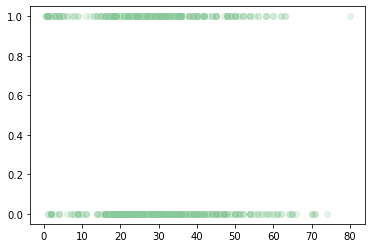

In [8]:
plt.scatter(df['Age'],df['Survived'],alpha=0.2,color = '#88c999')

D:\Old Hdd\NotesSig\srivastav\o\ps\WPy64-3860\python-3.8.6.amd64\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

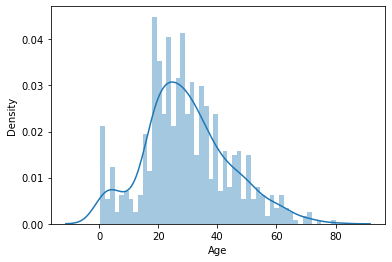

In [9]:
sns.distplot(df['Age'],kde=True,bins=50)

In [10]:
print('the missing % of age value is',df['Age'].isnull().sum()/df.shape[0]*100)
print('the missing % of cabin record is',df['Cabin'].isnull().sum()/df.shape[0]*100)

the missing % of age value is 19.865319865319865
the missing % of cabin record is 77.10437710437711


D:\Old Hdd\NotesSig\srivastav\o\ps\WPy64-3860\python-3.8.6.amd64\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Embarked', ylabel='count'>

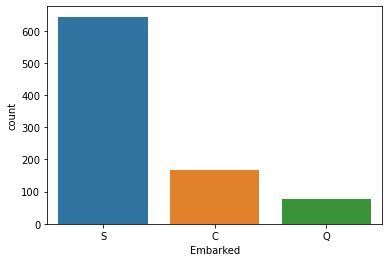

In [11]:
sns.countplot(df['Embarked'])

In [12]:
dft=df.copy()
dft['Age'].fillna(df['Age'].median(skipna= True),inplace = True)
df['Embarked']=df['Embarked'].fillna(df['Embarked'].value_counts().idxmax())

In [13]:
dft.drop('Cabin',axis=1, inplace=True)
dft.drop('Ticket',axis=1, inplace=True)

In [14]:
dft['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

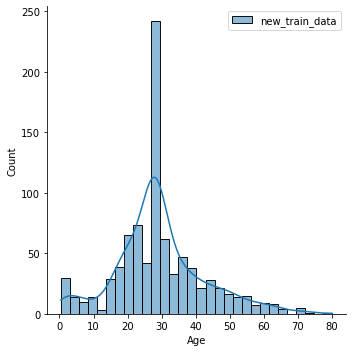

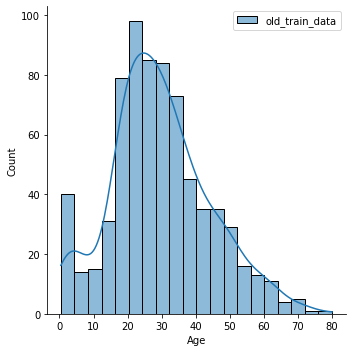

In [15]:
sns.displot(dft['Age'],kde=True,label='new_train_data')
plt.legend()
sns.displot(df['Age'],kde=True,label='old_train_data')
plt.legend()
plt.show()

In [16]:
dft['alone']=np.where((df['SibSp']+df['Parch'])>0,0,1)
dft.drop('SibSp', axis=1, inplace=True)
dft.drop('Parch', axis=1, inplace=True)
dft.drop('Name', axis=1, inplace=True)
dft.drop('PassengerId', axis=1, inplace=True)

In [17]:
dft.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,alone
0,0,3,male,22.0,7.2500,S,0
1,1,1,female,38.0,71.2833,C,0
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,0
4,0,3,male,35.0,8.0500,S,1


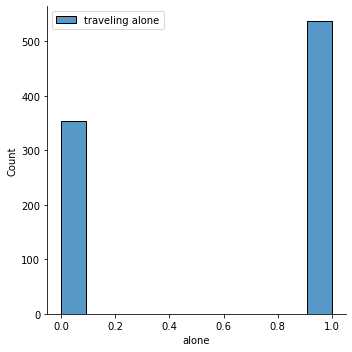

In [18]:
sns.displot(dft['alone'],kde=False,label='traveling alone')
plt.legend()

In [19]:
print(df1.head(10))
print(df1.shape)

   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   
5          897       3                    Svensson, Mr. Johan Cervin    male   
6          898       3                          Connolly, Miss. Kate  female   
7          899       2                  Caldwell, Mr. Albert Francis    male   
8          900       3     Abrahim, Mrs. Joseph (Sophie Halaut Easu)  female   
9          901       3                       Davies, Mr. John Samuel    male   

    Age  SibSp  Parch     Ticket     Fare Cabin Embarked  
0  34.5      0      0     330911   7.8292   NaN        Q  
1

In [20]:
dfts=df1.copy()
dfts.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [21]:
dfts.drop('Cabin',axis=1,inplace=True)
dfts.fillna(df1['Age'].median(skipna=True),inplace=True)
dfts.fillna(df1['Fare'].median(skipna=True),inplace=True)
dfts.drop('PassengerId',axis=1,inplace=True)
dfts.drop('Name',axis=1,inplace=True)
dfts.drop('Ticket',axis=1,inplace=True)
dfts['alone']=np.where(dfts['SibSp']+dfts['Parch']>0,0,1)
dfts.drop('SibSp',axis=1,inplace=True)
dfts.drop('Parch',axis=1,inplace=True)

In [22]:
dfts.head()

,Pclass,Sex,Age,Fare,Embarked,alone
0,3,male,34.5,7.8292,Q,1
1,3,female,47.0,7.0000,S,0
2,2,male,62.0,9.6875,Q,1
3,3,male,27.0,8.6625,S,1
4,3,female,22.0,12.2875,S,0


<AxesSubplot:xlabel='Age', ylabel='Density'>

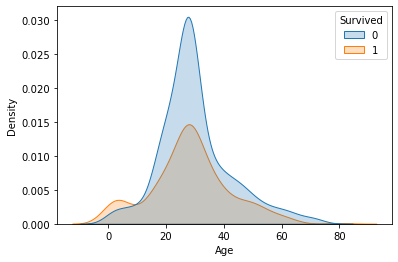

In [23]:
sns.kdeplot(dft['Age'],hue=dft['Survived'],shade=True)

D:\Old Hdd\NotesSig\srivastav\o\ps\WPy64-3860\python-3.8.6.amd64\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

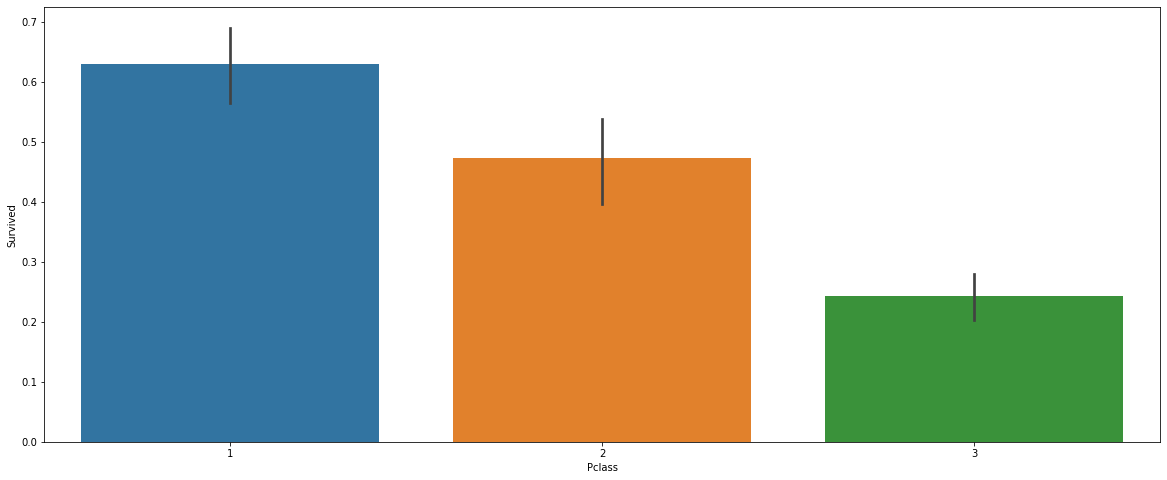

In [24]:
plt.figure(figsize=(20,8))
sns.barplot(dft['Pclass'],dft['Survived']==1)

D:\Old Hdd\NotesSig\srivastav\o\ps\WPy64-3860\python-3.8.6.amd64\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

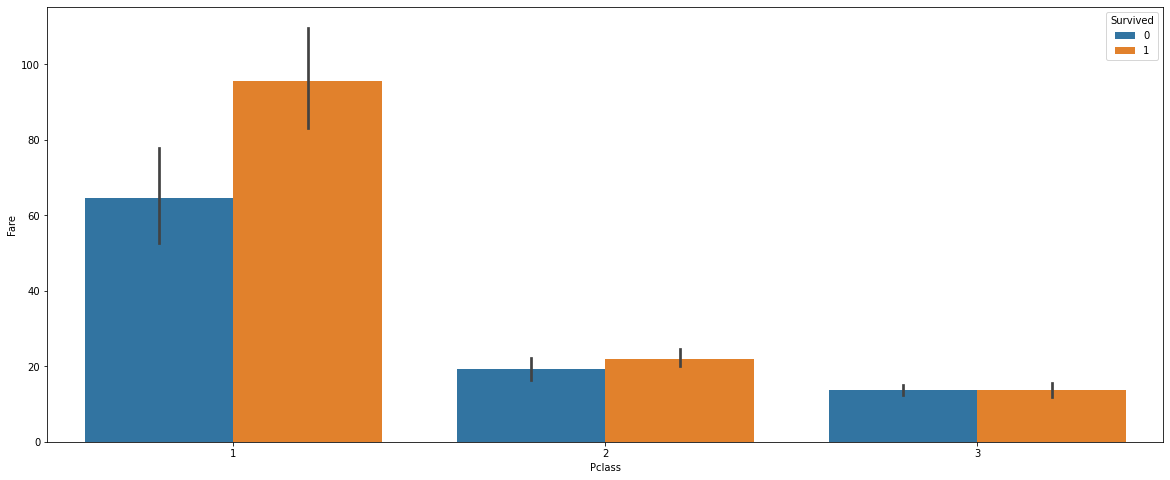

In [25]:
plt.figure(figsize=(20,8))
sns.barplot(dft['Pclass'],dft['Fare'],hue=dft['Survived'])

D:\Old Hdd\NotesSig\srivastav\o\ps\WPy64-3860\python-3.8.6.amd64\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='Survived'>

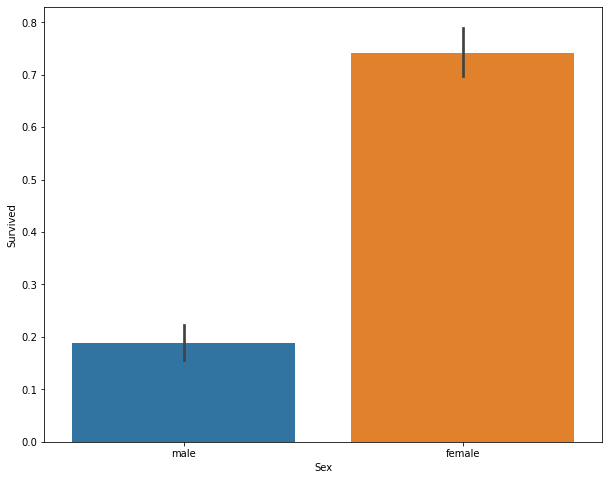

In [26]:
plt.figure(figsize=(10,8))
sns.barplot(dft['Sex'],dft['Survived'])


D:\Old Hdd\NotesSig\srivastav\o\ps\WPy64-3860\python-3.8.6.amd64\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


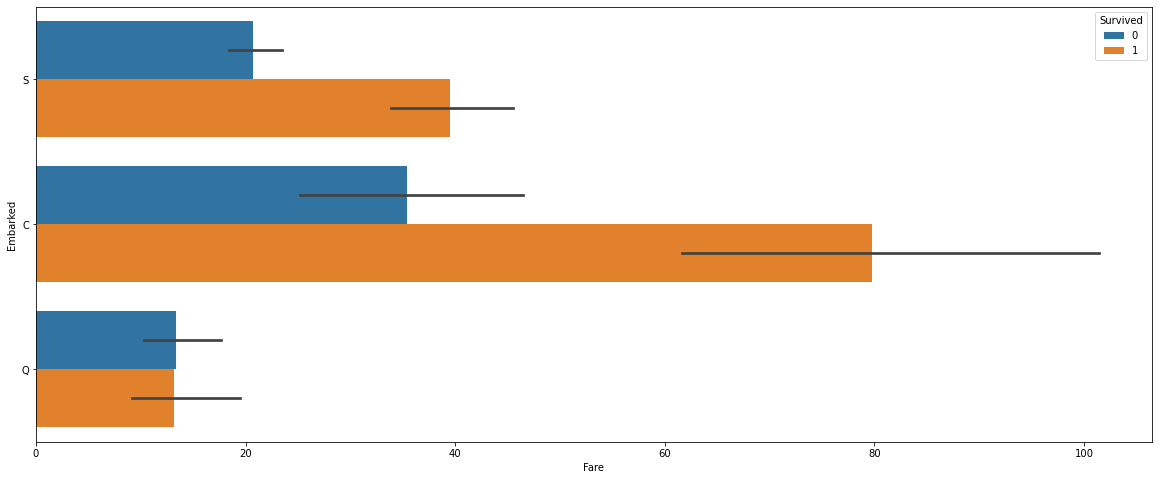

In [27]:
plt.figure(figsize=(20,8))
sns.barplot(dft['Fare'],dft['Embarked'],hue=dft['Survived'])
plt.show()

D:\Old Hdd\NotesSig\srivastav\o\ps\WPy64-3860\python-3.8.6.amd64\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='alone', ylabel='Survived'>

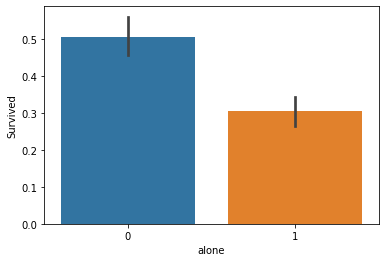

In [28]:
sns.barplot(dft['alone'],dft['Survived'])

In [29]:
avg = dft[["Age", "Survived"]].groupby(['Age']).mean()

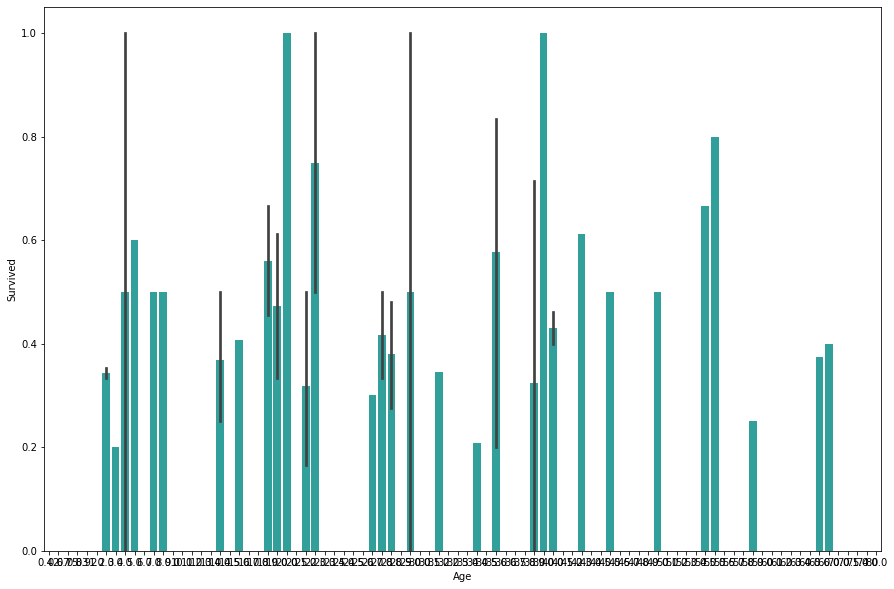

In [30]:
plt.figure(figsize=(15,10))
g = sns.barplot(x=dft['Age'], y=avg['Survived'],color="LightSeaGreen")
plt.show()

In [31]:
dft.head(2)

,Survived,Pclass,Sex,Age,Fare,Embarked,alone
0,0,3,male,22.0,7.2500,S,0
1,1,1,female,38.0,71.2833,C,0


In [32]:
cat=['Sex','Embarked','Pclass']
X=pd.get_dummies(dft,prefix='OHE',columns=cat)
Y=pd.get_dummies(dfts,prefix='OHE',columns=cat)

In [33]:
X.drop('OHE_male',inplace=True,axis=1) #drop this for something diffrent
X.drop('Survived',inplace=True,axis=1)

In [34]:
Y.drop('OHE_male',inplace=True,axis=1)

In [35]:
y=dft['Survived']

In [36]:
from sklearn.feature_selection import RFE
lr=LogisticRegression()
rfe = RFE(lr, 8)
rfe = rfe.fit(X, y)

D:\Old Hdd\NotesSig\srivastav\o\ps\WPy64-3860\python-3.8.6.amd64\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=8 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [37]:
print('Selected features: %s' % list(X.columns[rfe.support_]))
selected_fetures=list(X.columns[rfe.support_])
X=X[selected_fetures]

Selected features: ['Age', 'OHE_female', 'OHE_C', 'OHE_Q', 'OHE_S', 'OHE_1', 'OHE_2', 'OHE_3']


8
Index(['Age', 'OHE_female', 'OHE_C', 'OHE_Q', 'OHE_S', 'OHE_1', 'OHE_2',
       'OHE_3'],
      dtype='object')


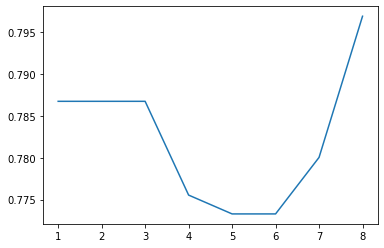

In [38]:
from sklearn.feature_selection import  RFECV
rfecv=RFECV(estimator=lr,cv=10,scoring='accuracy')
rfecv.fit(X,y)
print(rfecv.n_features_)
print(X.columns[rfecv.support_])
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

<AxesSubplot:>

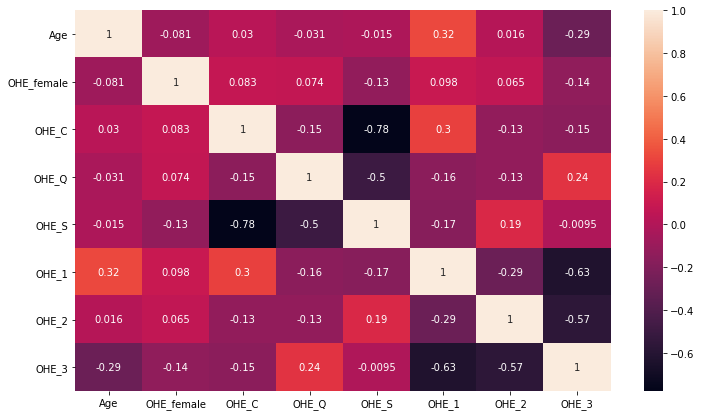

In [39]:
plt.figure(figsize=(12,7))
sns.heatmap(X.corr(),annot=True)

In [40]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=22)

In [41]:
lr.fit(xtrain,ytrain)

LogisticRegression()

In [42]:
ypred=lr.predict(xtest)

In [43]:
ypredproba = lr.predict_proba(xtest)[:, 1]

In [44]:
[fpr,tpr,thr]=roc_curve(ytest,ypredproba)

In [45]:
print(accuracy_score(ytest,ypred))
print(auc(fpr,tpr))
log_loss(ytest,ypredproba)


0.776536312849162
0.8218708827404478


0.4781419756281223

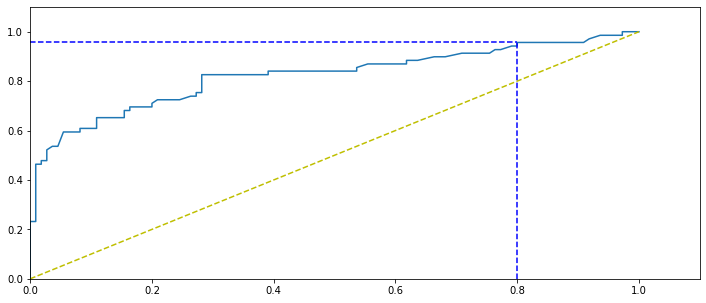

In [46]:
idx = np.min(np.where(tpr > 0.95))
plt.figure(figsize=(12,5))
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], 'y--')
plt.plot([0,fpr[idx]],[tpr[idx],tpr[idx]],'c--', color='blue')
plt.plot([fpr[idx],fpr[idx]],[0,tpr[idx]],'c--',color='blue')
plt.xlim([0.0, 1.1])
plt.ylim([0.0, 1.1])
plt.show()

In [47]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(lr,X,y,cv=10,scoring='accuracy')
score_loss=cross_val_score(lr,X,y,cv=10,scoring='neg_log_loss')
score_auc=cross_val_score(lr,X,y,cv=10,scoring='roc_auc')
print('logistic regression accuracy score is',score.mean())
print('logistic regression log loss is',-score_loss.mean())
print('logistic regressionavg auc is',score_auc.mean())

logistic regression accuracy score is 0.7968789013732834
logistic regression log loss is 0.45422220780914085
logistic regressionavg auc is 0.848674249497779


In [48]:
from sklearn.model_selection import cross_validate
paas={'accuracy':'accuracy','logloss':'neg_log_loss','auc':'roc_auc'}
model=LogisticRegression()
result=cross_validate(model,X,y,cv=10,scoring=paas,return_train_score=False)

for i in result:
    if i=='test_accuracy':
           print('accuracy is',result[i].mean())
    if i =='test_logloss':
        print('logloss is ',-result[i].mean())
    if i =='test_auc':
        print('auc ',result[i].mean())



accuracy is 0.7968789013732834
logloss is  0.45422220780914085
auc  0.848674249497779


In [56]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': np.arange(1e-05, 3, 0.1)}
scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}

gs = GridSearchCV(LogisticRegression( solver='lbfgs', max_iter=250 ), return_train_score=True,
                  param_grid=param_grid, scoring=scoring, cv=10, refit='Accuracy')

gs.fit(X, y)
results = gs.cv_results_

print('='*20)
print("best params: " + str(gs.best_estimator_))
print("best params: " + str(gs.best_params_))
print('best score:', gs.best_score_)
print(gs.best_params_)
print('='*20)
means = gs.cv_results_['mean_test_AUC']
stds = gs.cv_results_['std_test_AUC']

for mean, std, params in zip(means, stds, gs.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))

best params: LogisticRegression(C=0.10001, max_iter=250)
best params: {'C': 0.10001}
best score: 0.8013982521847691
{'C': 0.10001}
0.540 (+/-0.107) for {'C': 1e-05}
0.847 (+/-0.059) for {'C': 0.10001}
0.847 (+/-0.059) for {'C': 0.20001000000000002}
0.848 (+/-0.058) for {'C': 0.30001000000000005}
0.848 (+/-0.058) for {'C': 0.40001000000000003}
0.848 (+/-0.058) for {'C': 0.50001}
0.848 (+/-0.058) for {'C': 0.60001}
0.849 (+/-0.058) for {'C': 0.70001}
0.849 (+/-0.058) for {'C': 0.80001}
0.849 (+/-0.058) for {'C': 0.90001}
0.849 (+/-0.058) for {'C': 1.00001}
0.849 (+/-0.058) for {'C': 1.1000100000000002}
0.849 (+/-0.058) for {'C': 1.2000100000000002}
0.849 (+/-0.058) for {'C': 1.30001}
0.849 (+/-0.058) for {'C': 1.4000100000000002}
0.849 (+/-0.058) for {'C': 1.50001}
0.849 (+/-0.058) for {'C': 1.6000100000000002}
0.849 (+/-0.058) for {'C': 1.7000100000000002}
0.849 (+/-0.058) for {'C': 1.80001}
0.849 (+/-0.058) for {'C': 1.9000100000000002}
0.849 (+/-0.058) for {'C': 2.00001}
0.849 (+/-0.0

[(0, 1), (1, 10), (2, 100), (3, 1000)]


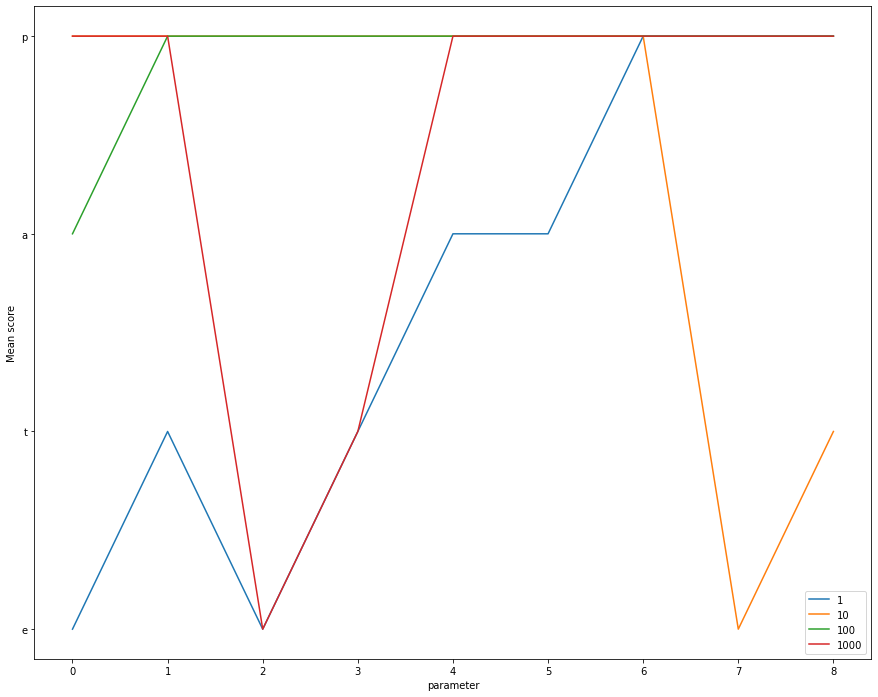

In [50]:
plt.figure(figsize=(15,12))
xaxis = list(range(9))
Cs = [1, 10, 100, 1000]
scores = [x[1] for x in gs.cv_results_]
scores = np.array(scores).reshape(9,9)
print(list(enumerate(Cs)))
for ind, i in enumerate(Cs):
    plt.plot(xaxis, scores[ind], label=str(i))
plt.legend()
plt.xlabel('parameter')
plt.ylabel('Mean score')
plt.show()

In [51]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
std_scale=StandardScaler()
from sklearn.model_selection import RepeatedStratifiedKFold
C = np.arange(1e-05, 5.5, 0.1)
n_folds=5
n_repeats=5
rskfold = RepeatedStratifiedKFold(n_splits=n_folds, n_repeats=n_repeats, random_state=2)


log_clf_pipe = Pipeline(steps=[('scale',std_scale), ('clf',model)])

log_clf = GridSearchCV(estimator=log_clf_pipe, cv=rskfold,
              scoring=scoring, return_train_score=True,
              param_grid=dict(clf__C=C), refit='Accuracy')

log_clf.fit(X, y)
results = log_clf.cv_results_

In [83]:
Y['Survived']=log_clf.predict(Y[selected_fetures])
Y['PassengerId'] = df1['PassengerId']
submission = Y[['PassengerId','Survived']]
submission.to_csv("submission.csv", index=False)
submission.tail()

,PassengerId,Survived
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,0


In [86]:
sub=pd.read_csv('submission.csv')
sub.head(5)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
